# Plotting Weather Patterns


## Assignment

<p>For this assignment, you will work with real world CSV weather data. You will manipulate the data to display the minimum and maximum temperature for a range of dates and demonstrate that you know how to create a line graph using matplotlib. Additionally, you will demonstrate procedure of composite charts, by overlaying a scatter plot of record breaking data for a given year.

Note: If you want more anonymity, only include the country of where the data is from rather than the specific region or city.</p>

### Goal 1

<p>Write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.</p>

<strong>NOTES</strong>
- The documentation hints that the "value : data value for element (tenths of degrees C)" so we multiple our data by .1' which means we need to <strong>transform</strong> the data
- It's also in Celcius, so we might want to change to fahrenheit
- We need to make sure that the data is from 2005 - 2014


## Data Cleaning

#### Importing Libaries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import matplotlib as mpl
import numpy as np

#### Importing Data

In [2]:
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

#### Previewing the data

In [3]:
print(df.head())

            ID        Date Element  Data_Value
0  USW00094889  2014-11-12    TMAX          22
1  USC00208972  2009-04-29    TMIN          56
2  USC00200032  2008-05-26    TMAX         278
3  USC00205563  2005-11-11    TMAX         139
4  USC00200230  2014-02-27    TMAX        -106


<p><p>
<strong></strong>
    
    

<p> We notice that the date is not separated by Year, Month, and Day<p>


#### Adjusting Data 

In [4]:
# transforming the data so its normalized to the appropiate C'
df['Data_value'] = df['Data_Value'] * .1

#### Separating the Year

In [5]:
# Creating a column named Year
df['Year'] = df['Date'].apply(lambda x: x[0:4])

#### Separating the Month and Day

In [6]:
# Creating a month and Day column because we can group data by year then by month
df['monthDay'] = df['Date'].apply(lambda x: x[-5:])

#### Removing leap-year days

In [7]:
# There is a hint to watch out for leap-years, so we make sure to remove them
df = df[df['monthDay'] != '02-29'] 

#### Converting tempature to Fahrenheit

In [8]:
# Formula to convert C to F (32°F − 32) × 5/9 = 0°C
df['Tempature'] = df['Data_value'].apply(lambda x: (x* (9/5)) +32)

#### Separate Out 2015


In [9]:
# Saving all the values that are 2015 in a separate Dataframe
df_15 = df[df['Year']=='2015']

In [10]:
# ~ the tilde sign is saying do the opposite of whatever the outcome is
# so im saying 
# create a dataframe = this is a dataframe[do the opposite(find all the values in dataframe['Year'] that are 2015)]
df = df[~(df['Year'] == '2015')]

- I could make the year column into an int type and do something where I use a for loop to go through the rows checking if value is greater than 2014 to separate out 2015

- What else I can do is check if a value is is '2015', if it is store it
- - Remove those from the original Dataframe

<strong> Checking the status of the dataframe </strong>

In [11]:
df.head()

,ID,Date,Element,Data_Value,Data_value,Year,monthDay,Tempature
0,USW00094889,2014-11-12,TMAX,22,2.2,2014,11-12,35.96
1,USC00208972,2009-04-29,TMIN,56,5.6,2009,04-29,42.08
2,USC00200032,2008-05-26,TMAX,278,27.8,2008,05-26,82.04
3,USC00205563,2005-11-11,TMAX,139,13.9,2005,11-11,57.02
4,USC00200230,2014-02-27,TMAX,-106,-10.6,2014,02-27,12.92


<strong> For dataframe with 2015 ONLY </strong>

In [12]:
df_15.head()

,ID,Date,Element,Data_Value,Data_value,Year,monthDay,Tempature
19,USC00205563,2015-01-03,TMIN,-39,-3.9,2015,01-03,24.98
30,USC00203712,2015-03-17,TMAX,189,18.9,2015,03-17,66.02
34,USC00200032,2015-06-06,TMIN,128,12.8,2015,06-06,55.04
46,USW00014833,2015-08-30,TMIN,178,17.8,2015,08-30,64.04
50,USC00202308,2015-08-30,TMIN,156,15.6,2015,08-30,60.08


## Data Wrangling

Need to filter the data by year, then sort by the MAX monthDay <br>
In other words we to sort the values in cronological order. Doing this will allow us to understand the data a little bit better. 

In [13]:
# creating a new dataframe
# data = df.sort_values(['Year','monthDay'])
df.sort_values(['Year','monthDay']).head()

,ID,Date,Element,Data_Value,Data_value,Year,monthDay,Tempature
1860,USC00202308,2005-01-01,TMAX,150,15.0,2005,01-01,59.00
1906,USC00205822,2005-01-01,TMIN,-17,-1.7,2005,01-01,28.94
2035,USC00202308,2005-01-01,TMIN,-17,-1.7,2005,01-01,28.94
2073,USC00203712,2005-01-01,TMAX,144,14.4,2005,01-01,57.92
2812,USC00203712,2005-01-01,TMIN,-50,-5.0,2005,01-01,23.00


<p>Before sorting the data, I was under the assumption that there is a TMAX and a TMIN unique for everyday. </p>
<p>This was the wrong assumption.</p>
<p>Turns out that there are various tempatures for <strong>EACH DAY </strong> for <strong>EACH YEAR</strong>. <br>
Additionally, I forgot that I need to separate the TMAX and TMIN, so I do that now<p>

#### Separating TMAX and TMIN

In [14]:
data = df.sort_values(['Year','monthDay'])
TMAX_ = data[data.Element == 'TMAX']
TMIN_ = data[data.Element == 'TMIN']

In [15]:
# Checking the TMAX dataframe
# TMAX_.head()

In [16]:
# Checking the TMIN Dataframe
# TMIN_.head()

#### Getting the Min and Max PER year and Day
<p>We need to plot the MAX and MIN tempatures of <strong>EVERY DAY</strong> over the span of 2005-2014</p>
<p> In other words, for day/month through ex. 01/01/2005 - 01/01/2014 , we need the MAX and MIN. <br>Then do that for 01/02/2005 - 01/02/2014, and so on</p>

In [17]:
# In order to do this we first use the groupby() method
## so every 01-01 regardless of year is groupped together
### Then use the agg() method to aggregate a list for the groupby()
#### The list is using the axis(column or row) 'Data_value' so all the 
##### Data_values that are 01-01 are in a list, then we use the function
###### np.max to get the 'biggest' value. We do this for the min as well. 

In [18]:
test_max = TMAX_.groupby('monthDay').agg({'Data_value':np.max})

In [19]:
test_min = TMIN_.groupby('monthDay').agg({'Data_value':np.min})

In [20]:
test_max.reset_index()

,monthDay,Data_value
0,01-01,15.6
1,01-02,13.9
2,01-03,13.3
3,01-04,10.6
4,01-05,12.8
...,...,...
360,12-27,18.9
361,12-28,19.4
362,12-29,12.8
363,12-30,11.7


#### CHECK UP
<strong>What do we have</strong>
- A dataframe with all the MAX tempatures between 2005-2014
- A dataframe with all the MIN tempatures between 2005-2014
- They are converted from C to F
- No Leap Years include

<p>So we can plot now!</p>


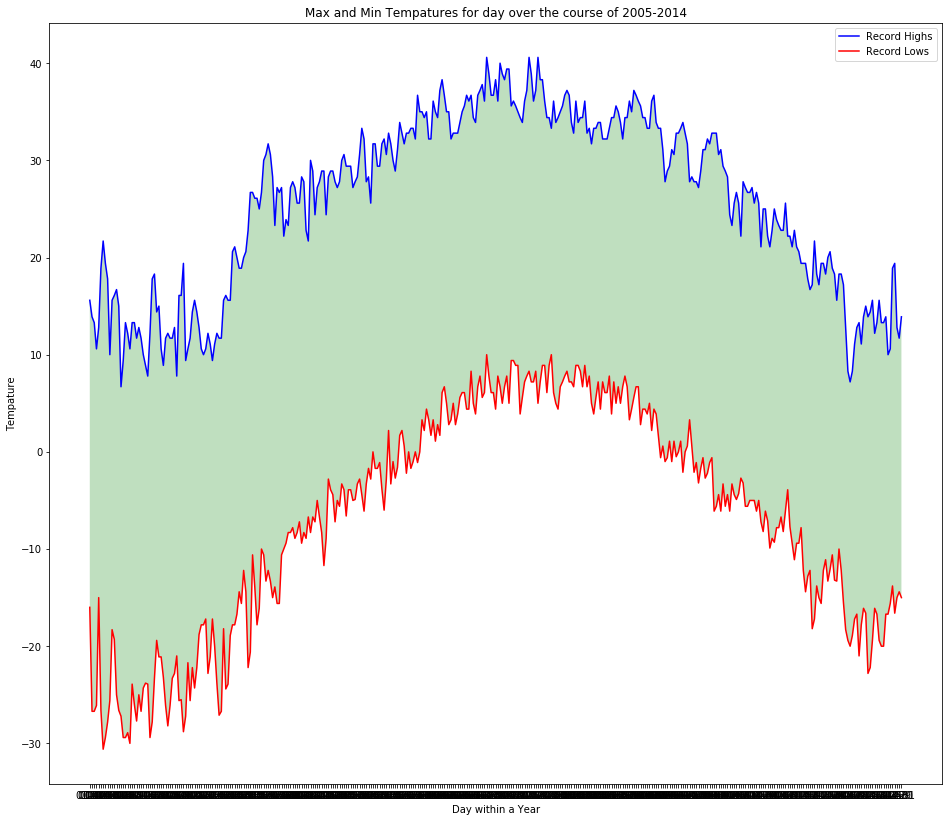

In [21]:
plt.figure(figsize=(16,14))
# Only do if the top is commented out
## plt.figure()

plt.plot(test_max,color='b',marker='None')
plt.plot(test_min,color='r',marker='None')
plt.xlabel('Day within a Year')
plt.ylabel('Tempature')
plt.title('Max and Min Tempatures for day over the course of 2005-2014')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Record Highs', 'Record Lows', 'Us'])
# plt.plot(test_max[1:365],color='red',marker='o',linestyle='solid')
# plt.plot(test_min[1:365],color='blue',marker='o',linestyle='solid')

plt.gca().fill_between(range(len(test_max)), 
                       test_min.Data_value, test_max.Data_value, 
                       facecolor='green', 
                       alpha=0.25)

#### Aesthetic Changes 
- the X axis labels look horrible. Should we indexed as 1-365 
- The color can be a gradient rather than a solid color (For Another Day)

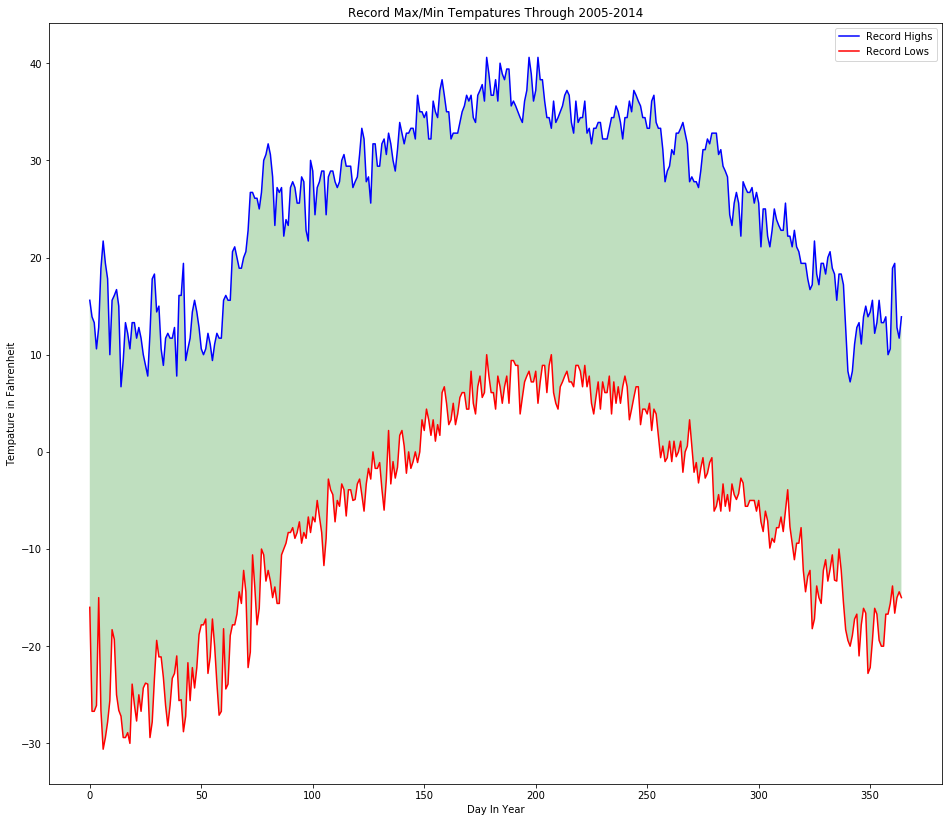

In [22]:
plt.figure(figsize=(16,14))

plt.plot(test_max.reset_index().Data_value,color='b',marker='None') # Changed added reset_index()
plt.plot(test_min.reset_index().Data_value,color='r',marker='None') # Changed added reset_index()

plt.xlabel('Day In Year')
plt.ylabel('Tempature in Fahrenheit')

plt.title('Record Max/Min Tempatures Through 2005-2014')

plt.legend(['Record Highs', 'Record Lows'])

plt.gca().fill_between(range(len(test_max)), 
                       test_min.Data_value, test_max.Data_value, 
                       facecolor='green', 
                       alpha=0.25)

## Goal 2

<strong>Overlay a scatter of the 2015 data for any points (highs and lows) for which <br>the ten year record (2005-2014) record high or record low was broken in 2015.</strong>
<p>
<br>
Will separate the TMIN and TMAX for the 2015 dataframe, just like we did with the test_min and test_max</p>

In [23]:
# I need to make a min and max for the df_15
df_15_min = df_15[df_15.Element == 'TMIN']
df_15_max = df_15[df_15.Element == 'TMAX']

<p>Now I need to figure out which values in the 2015 dataframe are higher or lower than the record high/lows in the 2005-2014 dataframe </p>
<p>test_max = TMAX_.groupby('monthDay').agg({'Data_value':np.max})<br>
The code above is what we're comparing against </p>

In [24]:
# Create a new dataframes with the MIN and MAX for each day of the 2015 dataframe
test_15_max_0 = df_15_max.groupby('monthDay').agg({'Data_value':np.max})
test_15_min_0 = df_15_min.groupby('monthDay').agg({'Data_value':np.min})

In [25]:
# Creating a dataframe that will be used for the scatter plot
# Code reads as follows
## create dataframe = using the dataframe with all the maxes of 2015[ create a list of of indexes which 
### hold values that are greater than the values in the 2005-2014 dataframe].make sure to drop null values 

In [26]:
scatter_max = test_15_max_0[test_15_max_0 > test_max].dropna()
scatter_min = test_15_min_0[test_15_min_0 < test_min].dropna()

In [27]:
# IDEA... is the 2015 dataframe free of leap years? Double CHECK
### Checked, 2015 does not include the leap years. It was made from the 2004-2015 dataframe right after
### the leap year days were removed

<p> Checking how the scatter plot would look </p>

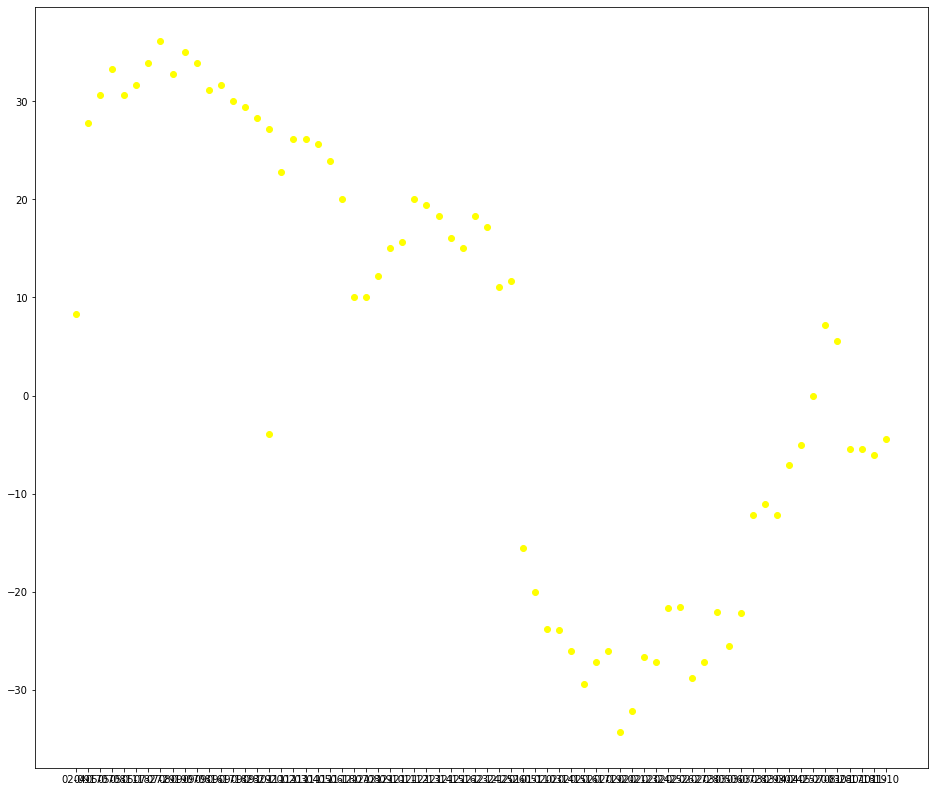

In [28]:
plt.figure(figsize=(16,14))
plt.scatter(scatter_max.index.tolist(), scatter_max['Data_value'].values, c = 'yellow', label = "Broken High in 2015")
plt.scatter(scatter_min.index.tolist(), scatter_min['Data_value'].values, c = 'yellow', label = "Broken Low in 2015")


<strong> Changes </strong><br>
<p> The index needs to fix. It's in dayMonth format.<p>
<p> Also the reset_index() method is starting the day from 0, rather than 1. FIX<>

In [29]:
test_15_max_0 = df_15_max.groupby('monthDay').agg({'Data_value':np.max}).reset_index()
test_15_min_0 = df_15_min.groupby('monthDay').agg({'Data_value':np.min}).reset_index()

In [31]:
scatter_max = test_15_max_0[test_15_max_0.Data_value > test_max.reset_index().Data_value].dropna()
scatter_min = test_15_min_0[test_15_min_0.Data_value < test_min.reset_index().Data_value].dropna()

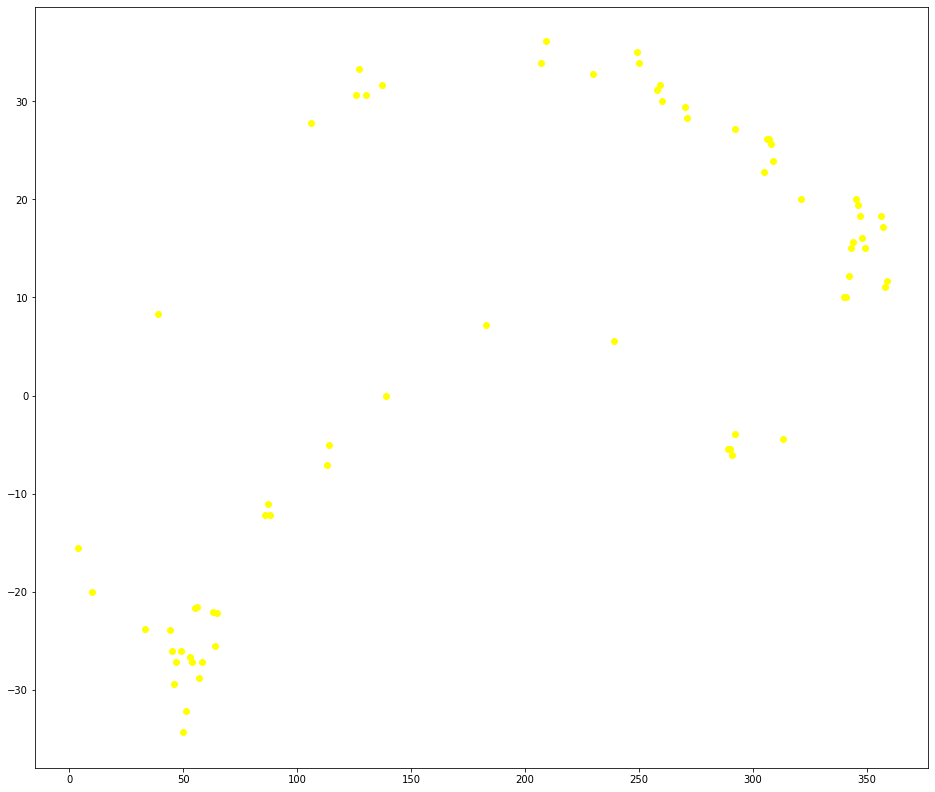

In [32]:
plt.figure(figsize=(16,14))
plt.scatter(scatter_max.index.tolist(), scatter_max['Data_value'].values, c = 'yellow', label = "Broken High in 2015")
plt.scatter(scatter_min.index.tolist(), scatter_min['Data_value'].values, c = 'yellow', label = "Broken Low in 2015")


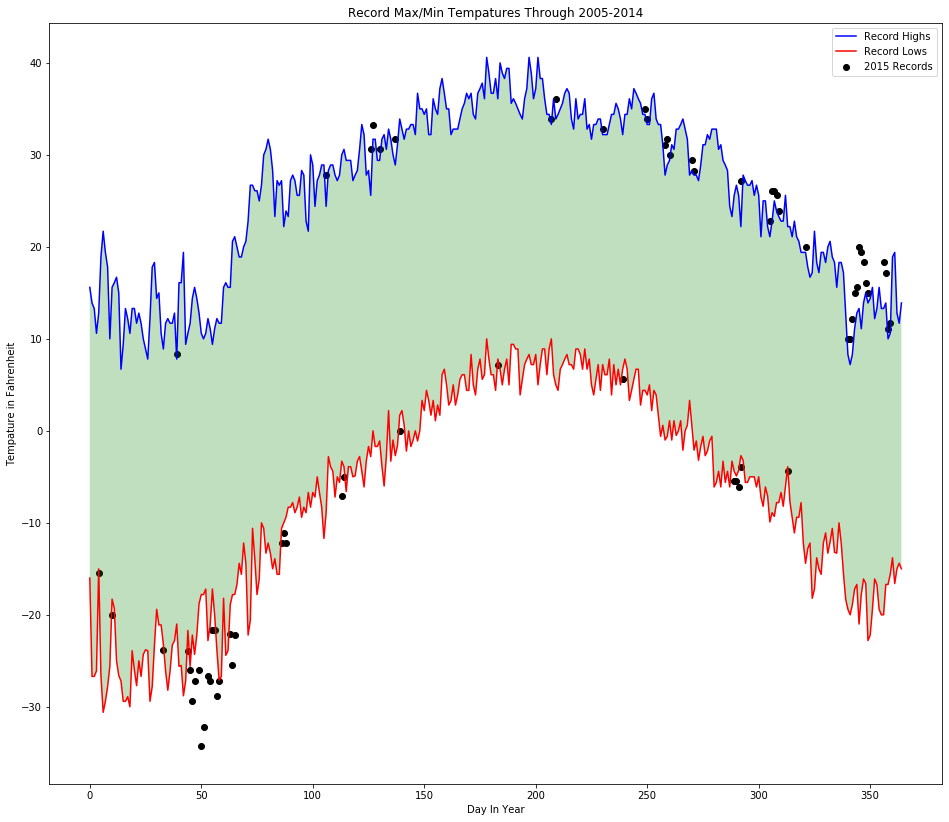

In [37]:
plt.figure(figsize=(16,14))

plt.plot(test_max.reset_index().Data_value,color='b',marker='None') # Changed added reset_index()
plt.plot(test_min.reset_index().Data_value,color='r',marker='None') # Changed added reset_index()

plt.xlabel('Day In Year')
plt.ylabel('Tempature in Fahrenheit')

plt.title('Record Max/Min Tempatures Through 2005-2014')

plt.scatter(scatter_max.index.tolist(), scatter_max['Data_value'].values, c = 'black', label = "Broken High in 2015")
plt.scatter(scatter_min.index.tolist(), scatter_min['Data_value'].values, c = 'black', label = "Broken Low in 2015")

plt.legend(['Record Highs', 'Record Lows','2015 Records'])

plt.gca().fill_between(range(len(test_max)), 
                       test_min.Data_value, test_max.Data_value, 
                       facecolor='green', 
                       alpha=0.25)

## DONE